# Использование LLM через Responses API

В этом ноутбуке мы рассмотрим, как использовать большие языковые модели (LLM) для различных задач, используя OpenAI-совместимый Responses API в Yandex Cloud.

Мы пройдём следующие этапы:
1. Настройка окружения и авторизация
2. Простой запрос к модели
3. Поддержание контекста диалога
4. Извлечение структурированных данных из отзывов с помощью LLM
5. Визуализация и агрегация результатов
6. Использование визуального входа для модели

## 1. Установка библиотек

Для начала, установим необходимые библиотеки:

In [ ]:
%pip install --upgrade openai python-dotenv pandas tqdm pydantic shwarsutils

> **ВНИМАНИЕ**: После установки библиотек рекомендуется перезапустить Kernel ноутбука.

## 2. Авторизация

Для работы с Yandex Cloud нам понадобится `folder_id` (идентификатор каталога) и `api_key` (API-ключ сервисного аккаунта). Мы предполагаем, что эти значения хранятся в файле `.env` в текущей директории.

In [ ]:
!curl -o .env {{url_of_dotenv_file}}\n

Загружаем значения `folder_id` и `api_key` в одноимённые переменные:

In [2]:
import os
from dotenv import load_dotenv

load_dotenv()

folder_id = os.environ["folder_id"]
api_key = os.environ["api_key"]

print(f"✅ Авторизация настроена (folder_id: {folder_id[:8]}...)")

✅ Авторизация настроена (folder_id: b1gbicod...)


Теперь создадим клиент OpenAI SDK для работы с моделями в Yandex Cloud:

In [ ]:
from openai import OpenAI

model = f"gpt://{folder_id}/qwen3-235b-a22b-fp8/latest"

client = OpenAI(
    base_url="https://ai.api.cloud.yandex.net/v1",
    api_key=api_key,
    project=folder_id
)

print(f"✅ Клиент создан")

Обратите внимание, что мы установили свой адрес `base_url` для обращения к модели в облаке Yandex, и использовали специфическое имя модели (содержащее в себе также `folder_id`).

Также добавим вспомогательную функцию для вывода ответа модели в формате Markdown:

In [4]:
from IPython.display import Markdown, display

def printx(string):
    """Вывод текста в формате Markdown."""
    display(Markdown(string))

## 3. Простой запрос к модели

Responses API — это современный способ взаимодействия с языковой моделью. Он позволяет отправлять запросы и получать ответы, а также поддерживать контекст диалога.

Отправим простой запрос о вокзалах Москвы:

In [5]:
res = client.responses.create(
    model=model,
    input="Какой лучший вокзал в Москве?"
)

printx(res.output_text)

В Москве нет одного «лучшего» вокзала — каждый из девяти железнодорожных вокзалов города имеет своё предназначение, зависит от направления поездов, удобства транспортной доступности и качества инфраструктуры. Однако, если оценивать по современности, комфорту и транспортной доступности, можно выделить несколько лидеров:

### 1. **Казанский вокзал**  
- **Почему популярен**: Современная реконструкция, красивый интерьер, удобная пересадка на метро (Комсомольская — центр пересадки на Кольцевую, Курско-Рижскую и Сокольническую линии).  
- **Направления**: Поезда на юг и восток — Казань, Уфа, Екатеринбург, Нижний Новгород, Адлер, Сочи.  
- **Плюсы**: Чистота, хорошие зоны ожидания, развитая инфраструктура (кафе, магазины, камеры хранения).

### 2. **Ленинградский вокзал**  
- **Самый старый вокзал Москвы** (открыт в 1849 году), но после реконструкции стал очень современным.  
- **Направления**: Санкт-Петербург, Хельсинки, Мурманск, Карелия.  
- **Плюсы**: Прямая пересадка на метро (площадь Ленина), архитектурная значимость, удобные экспресс-поезда («Сапсан» до Петербурга).  
- **Минусы**: Часто бывает перегружен из-за популярности направлений.

### 3. **Павелецкий вокзал**  
- **Один из самых современных** после реконструкции.  
- **Направления**: Воронеж, Ростов-на-Дону, Астрахань, Симферополь (Крым).  
- **Плюсы**: Прямая пересадка на Курско-Рижскую и Кольцевую линии метро, удобный аэроэкспресс до аэропорта Домодедово.  
- **Инфраструктура**: Шопинг-центр, хорошие зоны ожидания, Wi-Fi, кафе.

### 4. **Курский вокзал**  
- **Крупный транспортный узел**, тесно связан с Казанским и Ярославским (все три рядом на площади Комсомольская).  
- **Направления**: Курск, Харьков (до приостановки), поезда на юг и юго-восток.  
- **Плюсы**: Пересадка на метро, рядом с другими вокзалами.

---

### Какой из них **лучший**?  
Если выбирать по **современности и комфорту** — **Павелецкий** или **Ленинградский**.  
Если по **исторической ценности и архитектуре** — **Ленинградский**.  
Если по **удобству пересадок и популярности** — **Казанский** (благодаря площади Комсомольская).

📌 **Вывод**:  
> **Павелецкий вокзал** — часто считается самым комфортным и современным.  
> **Ленинградский** — лучший по сочетанию истории, транспортной доступности и скоростных поездов.  

Выбор зависит от вашего маршрута, но в целом **Павелецкий и Ленинградский** — лидеры по качеству сервиса.

При необходимости можно задать системный промпт (инструкцию для модели), который определяет её поведение:

In [6]:
res = client.responses.create(
    model=model,
    instructions="Ты - эксперт по железнодорожным вокзалам. Отвечай кратко и по делу.",
    input="Какой лучший вокзал в Москве?"
)

printx(res.output_text)

Лучший вокзал в Москве — Казанский. Он сочетает удобную транспортную доступность, развитую инфраструктуру, современные залы ожидания, качественные сервисы и прямое сообщение с метро (станция «Комсомольская»). Также рядом находятся другие вокзалы — «вокзальный квартал», что делает его транспортным хабом.

## 4. Поддержание контекста диалога

Responses API позволяет сохранять контекст между запросами. Для этого нужно:
1. Установить `store=True` при первом запросе (хотя это не обязательно, значение `True` используется по умолчанию)
2. Передавать `previous_response_id` в последующих запросах

Попробуем задать уточняющий вопрос:

In [7]:
# Первый запрос - спрашиваем про лучший вокзал
res = client.responses.create(
    model=model,
    store=True,  # Сохраняем ответ для продолжения диалога
    instructions="Ты - эксперт по железнодорожным вокзалам Москвы. Отвечай кратко.",
    input="Какой лучший вокзал в Москве?"
)

print(f"ID ответа: {res.id}")
printx(res.output_text)

ID ответа: 6eadc1fb-3951-4474-9b2f-8b5f7fa5cd72


Лучший вокзал в Москве — Казанский. Он удобен по расположению, хорошо связан с метро, имеет современную инфраструктуру и обслуживает популярные направления.

In [8]:
# Второй запрос - продолжаем диалог
res2 = client.responses.create(
    model=model,
    store=True,
    previous_response_id=res.id,  # Указываем ID предыдущего ответа
    input="А худший?"
)

printx(res2.output_text)

Сложно однозначно назвать "худший" вокзал в Москве — у каждого из девяти железнодорожных вокзалов есть свои плюсы и минусы. Однако по отзывам пассажиров и гостей города, **Рижский вокзал** чаще всего упоминается как наименее комфортный. Вот почему:

### Почему Рижский вокзал считают худшим:
- **Небольшой и перегруженный**: он самый маленький по размеру среди московских вокзалов, но при этом принимает много пригородных и дальнемагистральных поездов, из-за чего бывает тесно и шумно.
- **Старая инфраструктура**: несмотря на частичную реконструкцию, интерьеры выглядят устаревшими, а зоны ожидания — тесными.
- **Не самое удобное расположение**: хотя рядом есть метро (Рижская), сам район не считается центральным, и вокзал может казаться обособленным.
- **Ограниченный выбор услуг**: мало кафе, магазинов и зон комфорта по сравнению с Белорусским или Казанским вокзалами.

### Однако стоит учесть:
- Рижский вокзал — ключевой пункт для поездов в Северо-Запад России (Тверь, Нелидово, Рига и др.), и для многих пассажиров он остаётся удобным.
- Проводятся реконструкции, и ситуация постепенно улучшается.

### Альтернативы в рейтинге "не самых приятных":
- **Курский вокзал** — иногда критикуют за толпы и суматоху, особенно в час пик, но он крупный и современный.
- **Павелецкий** — старинное здание, но хорошо реконструирован, особенно после ремонта.

**Вывод:** если выбирать по "минусам", то **Рижский вокзал** чаще всего попадает в топ "наименее комфортных", но он всё равно выполняет важную транспортную функцию. А "лучший" — как уже говорилось, чаще всего называют **Казанский** или **Ленинградский** за удобство, чистоту и транспортную доступность.

Как видите, модель понимает контекст и отвечает на уточняющий вопрос, зная, что речь идёт о вокзалах Москвы.

Помимо передачи `previous_response_id`, можно также использовать специальный объект **conversation** для хранения контекста диалога, или накапливать весь диалог локально в виде списка отдельных сообщений такого вида:

```
[
  {
    "role": "system",
    "content": "Ты полезный ассистент, который даёт краткие и чёткие ответы."
  },
  {
    "role": "user",
    "content": "Какой лучший вокзал Москвы?"
  },
  {
    "role": "assistant",
    "content": "Киевский."
  },
  {
    "role": "user",
    "content": "А какой худший?"
  }
]
```

## 5. Извлечение структурированных данных из отзывов

Все мнения о вокзалах выше - это мнения языковой модели, почерпнутое из каких-то обучающих данных. Предположим, нам нужно составить мнение о вокзалах на основе каких-то реальных данных, например, отзывах пользователей о железнодорожных вокзалах Москвы с Яндекс.Карт.

### 5.1. Загрузка данных

Мы подготовили небольшую выборку таких данных. Загрузим их:

In [ ]:
from shwars.utils import *
download_file("https://raw.githubusercontent.com/yandex-ai-studio/ai-studio-course/main/data/rail_reviews.zip")
unzip_file("rail_reviews.zip")
print(" ✅ Данные загружены и распакованы.")

 ✅ Данные загружены и распакованы.


Загрузим все отзывы в DataFrame:

In [12]:
import json
import pandas as pd
from glob import glob

res = []
for fn in glob('*.json'):
    j = json.load(open(fn, encoding='utf-8'))
    for x in j:
        x['station'] = fn.split('_')[1]
    res.extend(j)
    
df = pd.DataFrame(res)
print(f"Загружено {len(df)} отзывов")
df.head()

Загружено 2269 отзывов


,id,dislike,like,review_text,author,review_rating,datetime,station
0,1251,1,10,"Очень красивое место, вежливый персонал.\nЕзди...",Александра Подгайская,5,2024-01-12T16:53:33.611Z,Belorussky
1,1252,0,5,"Расположен очень удобное, строятся новые пути ...",Пользователь Э.,5,2023-11-10T21:33:56.176Z,Belorussky
2,1253,2,7,Очень уютный и удобный вокзал. Мне он очень нр...,Н И,5,2023-08-25T14:27:29.327Z,Belorussky
3,1254,1,5,"Красивое здание , очень удобно расположено в т...",Liliya Zugrova,5,2023-11-27T11:50:16.388Z,Belorussky
4,1255,2,7,С появление новых веток и маршрутов все стало ...,Татьяна Цымлова,5,2023-11-25T06:43:16.558Z,Belorussky


### 5.2. Распределение отзывов по вокзалам

Посмотрим, как отзывы распределены между вокзалами:

<Axes: title={'center': 'Количество отзывов по вокзалам'}, xlabel='station'>

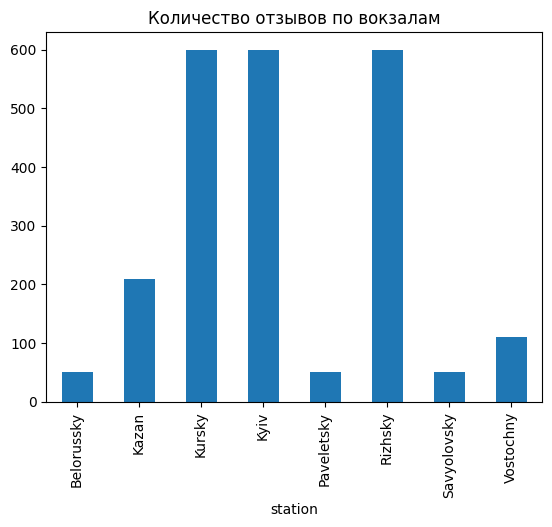

In [13]:
df.groupby('station')['review_text'].count().plot.bar(title='Количество отзывов по вокзалам')

### 5.3. Извлечение структурированных данных

При наличии отзывов, мы можем извлечь из них какие-то структурированные данные: степень позитивности или негативности отзыва, или даже более подробно плюсы и минусы, упомянутые в тексте.

Для этого мы можем вызвать LLM, и попросить её вернуть нам результат в формате JSON:

In [38]:
def analyze_review_json(review_text: str) -> dict:
    """
    Анализирует отзыв и возвращает результат в формате JSON.
    """
    prompt = f"""Проанализируй следующий отзыв о железнодорожном вокзале:

```
{review_text}
```

Верни результат в формате JSON:
{{
  "sentiment": "positive/negative/neutral",
  "transport": 0-5,
  "cleanliness": 0-5,
  "schedule": 0-5,
  "positive": ["..."],
  "negative": ["..."],
  "tags": ["..."]
}}

Оценки 1-5, если тема упоминается, или 0, если нет.
"""
    
    response = client.responses.create(
        model=model,
        instructions="Ты - аналитик отзывов. Отвечай строго в формате JSON.",
        input=prompt
    )
    
    # Извлекаем JSON из ответа
    text = response.output_text
    # Находим JSON в ответе
    start = text.find('{')
    end = text.rfind('}') + 1
    if start != -1 and end > start:
        return json.loads(text[start:end])
    return None

In [39]:
sample_review = df['review_text'].iloc[0]
print(f"Отзыв:\n{sample_review}\n")
result_json = analyze_review_json(sample_review)
print("Результат анализа (JSON Mode):")
print(json.dumps(result_json, ensure_ascii=False, indent=2))

Отзыв:
Очень красивое место, вежливый персонал.
Ездила на поезде из Москвы в Беларусь, комфортно, белье чистое, тепло, можно с животными. Дают горячий чай прям в постель, можно даже не переутруждаться, там о вВс и вашем комфорте позаботиться квалифицированные сотрудники.

Результат анализа (JSON Mode):
{
  "sentiment": "positive",
  "transport": 5,
  "cleanliness": 5,
  "schedule": 0,
  "positive": [
    "Очень красивое место",
    "Вежливый персонал",
    "Комфортно",
    "Белье чистое",
    "Тепло",
    "Можно с животными",
    "Дают горячий чай прям в постель",
    "О вашем комфорте позаботятся квалифицированные сотрудники"
  ],
  "negative": [],
  "tags": [
    "комфорт",
    "чистота",
    "персонал",
    "животные разрешены",
    "услуги на борту",
    "поезд Москва-Беларусь"
  ]
}


### 5.4. Structured Outputs

Несмотря на то, что мы просили модель вернуть результат в формате JSON, иногда она может ошибаться с форматом или с точным названием полей. Чтобы этого не происходило, Responses API поддерживает так называемый Structured Output — возможность получать ответ модели в строго определённом формате. Для этого проще всего использовать библиотеку `pydantic`, которая позволяет описать точную структуру данных.

Определим модель данных для анализа отзыва:

In [40]:
from pydantic import BaseModel, Field
from typing import List, Optional
from enum import Enum

class Sentiment(str, Enum):
    positive = "positive"
    negative = "negative"
    neutral = "neutral"

class ReviewAnalysis(BaseModel):
    """Результат анализа отзыва о вокзале."""
    
    sentiment: Sentiment = Field(description="Тональность отзыва")
    transport: int = Field(description="Оценка транспортной доступности (1-5, или 0 если не упоминается)", ge=0, le=5)
    cleanliness: int = Field(description="Оценка чистоты (1-5, или 0 если не упоминается)", ge=0, le=5)
    schedule: int = Field(description="Оценка точности расписания (1-5, или 0 если не упоминается)", ge=0, le=5)
    positive_points: List[str] = Field(description="Список положительных моментов")
    negative_points: List[str] = Field(description="Список отрицательных моментов")
    tags: List[str] = Field(description="Теги, описывающие основные темы отзыва")

Теперь создадим функцию для анализа отзыва с использованием Structured Outputs:

In [15]:
def analyze_review_structured(review_text: str) -> ReviewAnalysis:
    """
    Анализирует отзыв и возвращает структурированный результат.
    """
    response = client.responses.parse(
        model=model,
        instructions="""Ты - аналитик отзывов о железнодорожных вокзалах.
Проанализируй отзыв и извлеки структурированную информацию.
Оценки transport, cleanliness, schedule должны быть от 1 до 5, если тема упоминается в отзыве, или 0, если не упоминается.
В positive_points и negative_points включи краткие тезисы из отзыва.
В tags добавь ключевые темы на английском языке.""",
        input=review_text,
        text_format=ReviewAnalysis
    )
    
    return response.output_parsed

Основные отличия от предыдущего вызова:
* Мы используем `client.responses.parse` вместо `client.responses.create`
* Передаём pydantic-объект в поле `text_format`
* На выходе используем не `response.output_text`, а `response.output_parsed`

Протестируем функцию на одном отзыве:

In [41]:
print("Отзыв:")
print(sample_review)
print("\nРезультат анализа:")
result = analyze_review_structured(sample_review)
print(result)

Отзыв:
Очень красивое место, вежливый персонал.
Ездила на поезде из Москвы в Беларусь, комфортно, белье чистое, тепло, можно с животными. Дают горячий чай прям в постель, можно даже не переутруждаться, там о вВс и вашем комфорте позаботиться квалифицированные сотрудники.

Результат анализа:
sentiment=<Sentiment.positive: 'positive'> transport=5 cleanliness=5 schedule=5 positive_points=['Вежливый и квалифицированный персонал', 'Комфортные условия в поезде', 'Чистое постельное белье', 'Тепло в вагоне', 'Возможность перевозки с животными', 'Подают горячий чай прямо в постель', 'Хорошее обслуживание, забота о пассажирах'] negative_points=[] tags=['comfort', 'cleanliness', 'staff service', 'train journey', 'pet friendly', 'hot drinks', 'polite staff', 'on-time schedule']


### 5.5. Массовый анализ отзывов

Для ускорения времени демонстрации возьмём выборку — по 5 отзывов с каждого вокзала.

In [28]:
from tqdm.auto import tqdm

# Выборка по 5 отзывов с каждого вокзала
df_sample = df.groupby('station').apply(lambda x: x.sample(min(5, len(x)), random_state=42)).reset_index(drop=True)
print(f"Выборка: {len(df_sample)} отзывов")

# Анализируем отзывы
results = []
for idx, row in tqdm(df_sample.iterrows(), total=len(df_sample), desc="Анализ отзывов"):
    analysis = analyze_review_structured(row['review_text']).dict()
    for x in ['station','review_text']:
        analysis[x] = row[x]
    results.append(analysis)

df_analyzed = pd.DataFrame(results)
print(f"\nУспешно проанализировано: {len(df_analyzed)} отзывов")

Выборка: 40 отзывов


C:\Users\dmitr\AppData\Local\Temp\ipykernel_33672\2688415323.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sample = df.groupby('station').apply(lambda x: x.sample(min(5, len(x)), random_state=42)).reset_index(drop=True)


Анализ отзывов:   0%|          | 0/40 [00:00<?, ?it/s]

C:\Users\dmitr\AppData\Local\Temp\ipykernel_33672\2688415323.py:10: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  analysis = analyze_review_structured(row['review_text']).dict()



Успешно проанализировано: 40 отзывов


На выходе модели для каждого вокзала мы получаем pydantic-объект, превращаем его в словарь с помощью `.dict()`, добавляем название вокзала и исходный текст, и запоминаем все такие словари в списке. Из списка словарей затем легко получить таблицу `df_analyzed:` 

In [42]:
df_analyzed.head(10)

,sentiment,transport,cleanliness,schedule,positive_points,negative_points,tags,station,review_text
0,Sentiment.neutral,4,2,5,"[Красивое здание, Близко к метро Белорусская, ...","[Здание выглядит обветшалым, Неудобно для пасс...","[architecture, proximity to metro, lack of com...",Belorussky,Красивое здание и близкое расположение к станц...
1,Sentiment.positive,5,5,4,"[Удобное расположение в центре города, Легкий ...",[],"[location, public_transport_access, route_vari...",Belorussky,Я хотел бы поделиться своим положительным опыт...
2,Sentiment.positive,0,0,0,"[новое здание с современным залом ожидания, на...",[старое здание с необорудованными пандусами и ...,"[modern terminal, historical building, baggage...",Belorussky,Хороший вокзал. Есть новое здание с современны...
3,Sentiment.positive,5,0,0,[удобное расположение рядом с двумя станциями ...,[временные неудобства из-за благоустройства],"[location, metro access, parking, shops and ca...",Belorussky,Самый мой любимый вокзал. Всё понятно. Располо...
4,Sentiment.positive,5,5,0,"[Идёт ремонт и благоустройство вокзала, После ...",[],"[renovation, cleanliness, transport connectivi...",Belorussky,"Сейчась идет ремонт, благоустройство и соедине..."
5,Sentiment.positive,5,0,5,[Удобная и быстрая пересадка с Казанского вокз...,[],"[transfer_convenience, MCD_connection, archite...",Kazan,"Как житель Подмосковья, хочу отметить пересадк..."
6,Sentiment.positive,0,0,0,"[Красивый и просторный вокзал, Удобное располо...",[],"[architecture, staff_service, food_options, pl...",Kazan,Красивейший вокзал! Расположен на площади трёх...
7,Sentiment.negative,0,0,2,[Прекрасная архитектура здания],"[Только одно табло в главном зале, видимое с о...","[architecture, information_display, schedule_d...",Kazan,Прекрасная архитектура здания просто убита. \n...
8,Sentiment.positive,0,0,0,"[Один из лучших вокзалов, Красиво и безопасно,...",[],"[aesthetic, safety, food_options, shopping, pa...",Kazan,"Прекрасный вокзал. Один из лучших. Красиво , б..."
9,Sentiment.positive,0,0,0,"[Красивый и удобный вокзал, Много кафе, закусо...",[],"[convenience, amenities, waiting_area, food_an...",Kazan,Очень красивый удобный вокзал. Есть всё для то...


## 6. Визуализация результатов

Получив таблицу, мы можем легко визуализировать результаты.

### 6.1. Распределение тональности по вокзалам

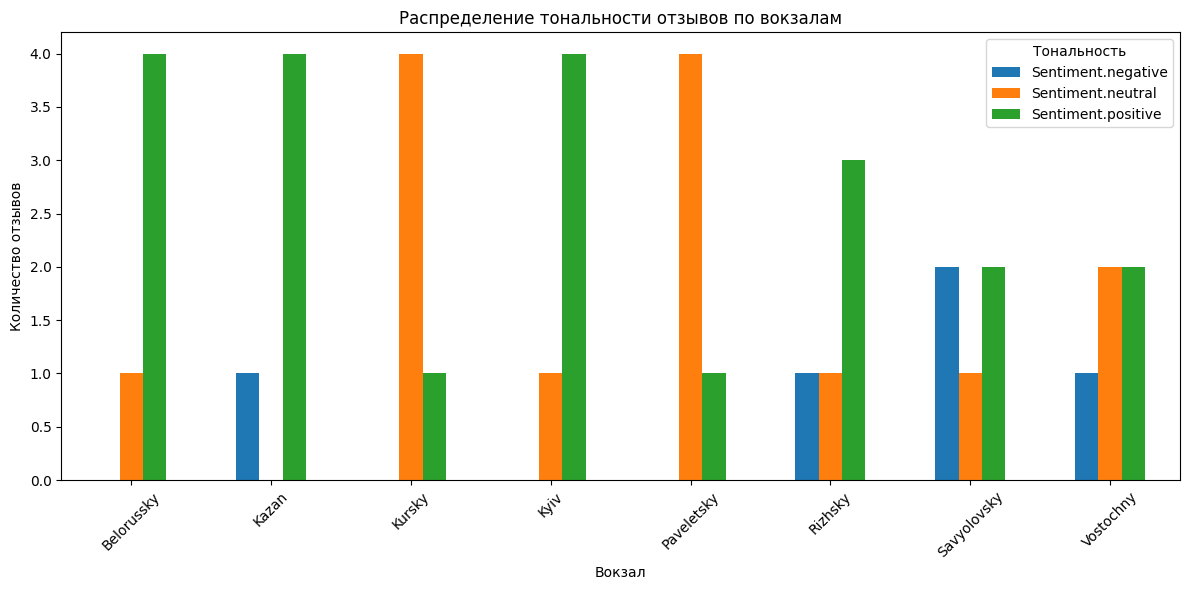

In [44]:
import matplotlib.pyplot as plt

# Подсчёт тональности по вокзалам
sentiment_counts = df_analyzed.groupby(['station', 'sentiment']).size().unstack(fill_value=0)
sentiment_counts.plot.bar(figsize=(12, 6), title='Распределение тональности отзывов по вокзалам')
plt.xlabel('Вокзал')
plt.ylabel('Количество отзывов')
plt.legend(title='Тональность')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 6.2. Средние оценки по критериям

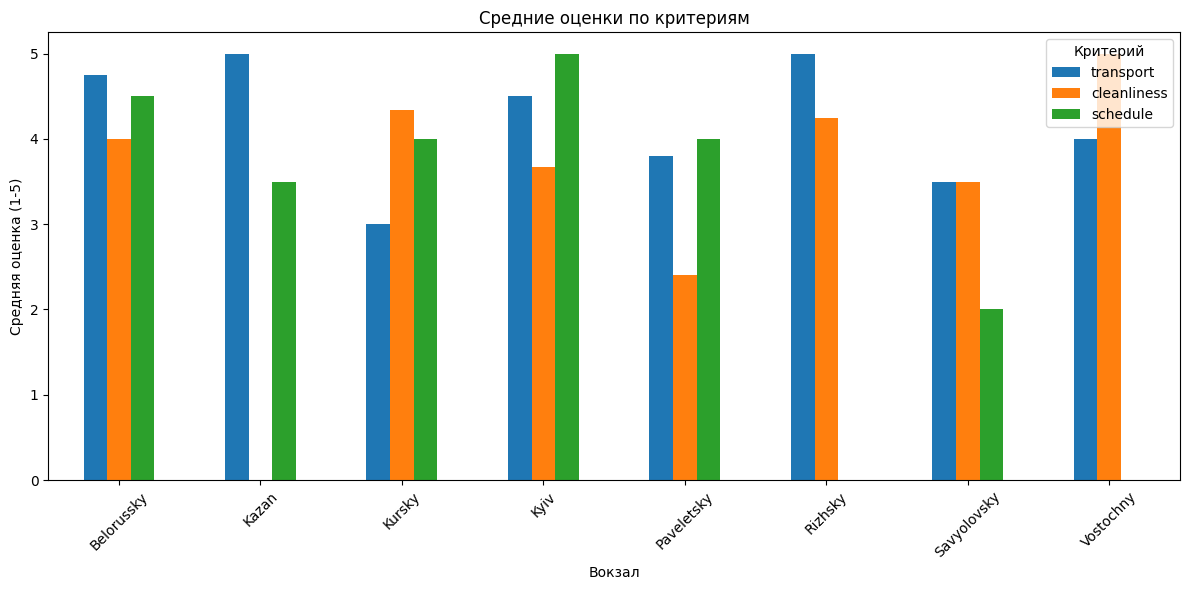

In [45]:
import numpy as np

# Заменяем 0 на NaN для корректного расчёта средних
for col in ['transport', 'cleanliness', 'schedule']:
    df_analyzed[col] = df_analyzed[col].apply(lambda x: np.nan if x == 0 else x)

# Средние оценки по вокзалам
avg_scores = df_analyzed.groupby('station').agg({
    'transport': 'mean',
    'cleanliness': 'mean',
    'schedule': 'mean'
})

avg_scores.plot.bar(figsize=(12, 6), title='Средние оценки по критериям')
plt.xlabel('Вокзал')
plt.ylabel('Средняя оценка (1-5)')
plt.legend(title='Критерий')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 7. Агрегация положительных и отрицательных моментов

Теперь используем LLM для создания сводки положительных и отрицательных моментов по каждому вокзалу.

In [50]:
# Собираем все положительные и отрицательные моменты по вокзалам
station_feedback = df_analyzed.groupby('station').agg({
    'positive_points': lambda x: ', '.join(sum(x,[])),
    'negative_points': lambda x: ', '.join(sum(x,[]))
}).reset_index()

station_feedback

,station,positive_points,negative_points
0,Belorussky,"Красивое здание, Близко к метро Белорусская, Х...","Здание выглядит обветшалым, Неудобно для пасса..."
1,Kazan,Удобная и быстрая пересадка с Казанского вокза...,"Только одно табло в главном зале, видимое с од..."
2,Kursky,"ведётся уборка, есть выделенные подъезды для т...","много бродяг и бездомных у вокзала, курение вб..."
3,Kyiv,"Красивый вокзал, Есть всё необходимое для ожид...","Парковка маловата, Туалет нормальный, но не са..."
4,Paveletsky,"Достаточно чисто, Хорошие туалеты, Разнообразн...","Бестолковые досмотры, Проблемы с санузлом, Неу..."
5,Rizhsky,Новые модели поездов выглядят чисто и ухоженно...,"Поезда в ужасном состоянии, особенно старые мо..."
6,Savyolovsky,"В целом вокзал хороший, Удобное расположение р...","Платформа 9 неудобно расположена, Сложный путь..."
7,Vostochny,"Чисто и аккуратно, Круглосуточное кафе, Много ...","Сложная навигация по вокзалу, Путающая планиро..."


In [51]:
def summarize_feedback(station_name: str, positive_feedback: str, negative_feedback: str) -> str:
    """
    Создаёт краткую сводку положительных и отрицательных моментов для вокзала.
    """
    prompt = f"""Проанализируй отзывы о вокзале {station_name}.

Положительные моменты из отзывов:
{positive_feedback}

Отрицательные моменты из отзывов:
{negative_feedback}

Создай краткую сводку (3-5 предложений) о впечатлениях посетителей от вокзала.
Выдели главные достоинства и недостатки.
"""
    
    response = client.responses.create(
        model=model,
        instructions="Ты - аналитик. Создавай краткие и информативные сводки.",
        input=prompt
    )
    
    return response.output_text

In [53]:
# Создаём сводки для каждого вокзала
summaries = []
for idx, row in tqdm(station_feedback.iterrows(), total=len(station_feedback), desc="Создание сводок"):
    summary = summarize_feedback(row['station'], row['positive_points'], row['negative_points'])
    summaries.append({
        'station': row['station'],
        'summary': summary
    })

df_summaries = pd.DataFrame(summaries)

Создание сводок:   0%|          | 0/8 [00:00<?, ?it/s]

In [54]:
# Выводим сводки
for idx, row in df_summaries.iterrows():
    printx(f"### {row['station']}")
    printx(row['summary'])
    printx("---")

### Belorussky

Вокзал Белорусский ценят за удобное расположение в центре Москвы, близость к двум станциям метро, хорошую транспортную доступность и широкий выбор поездов. Пассажиры отмечают чистоту, уют после ремонта, современные зоны ожидания, вежливый персонал и высокий уровень безопасности. Однако к минусам относят неудобства для пассажиров с багажом, старые лестницы без пандусов, сквозные и неуютные кафе, а также временные неудобства из-за текущего благоустройства. Некоторые отзывают неблагополучную атмосферу и необходимость раннего прибытия из-за досмотра. В целом, вокзал воспринимается как функциональный и безопасный, но с рядом архитектурных и бытовых недостатков.

---

### Kazan

Посетители высоко оценивают Казанский вокзал за его красивую архитектуру, просторные залы, яркое освещение и живую атмосферу, отмечая удобную пересадку на МЦД-4 и большое количество кафе, магазинов и мест для ожидания. Персонал вокзала чаще всего описывается как вежливый и готовый помочь. Однако гостей раздражает недостаток информационных табло — в главном зале работает только одно, часто с непонятным отображением статуса поездов, а также почти полное отсутствие рабочих розеток для зарядки. Несмотря на высокий уровень комфорта и удобное расположение, информационная инфраструктура требует модернизации.

---

### Kursky

Вокзал Курский производит впечатление современного, функционального и чистого транспортного узла с удобной инфраструктурой: здесь регулярно убирают, работают камеры хранения, есть много мест ожидания с розетками, бесплатный туалет и развитая торговая зона. Пассажиры отмечают хорошую организацию пространства, безопасность благодаря полицейским патрулям и удобные подъезды для такси. Однако серьёзными проблемами остаются антисанитария у входов — скопление бродяг, курение, мусор и пьянство пассажиров — а также суета, плохая навигация и отсутствие мест для отдыха и питания. В целом, несмотря на усилия по модернизации, вокзал испытывает давление из-за высокой нагрузки и недостаточного контроля за порядком.

---

### Kyiv

Вокзал Kyiv производит сильное впечатление благодаря сочетанию старинной архитектуры и современных удобств — посетители отмечают его эстетичность, чистоту, удобную навигацию и хорошо организованное пространство. Основные достоинства — вежливый персонал, наличие всех необходимых сервисов, уютные зоны ожидания и удобная транспортная инфраструктура вокруг. Однако есть и недостатки: малая парковка, скромное состояние туалетов и проблемы с покрытием на платформе 6, что создаёт неудобства для пассажиров с багажом. В целом, вокзал воспринимается как красивый и функциональный, но с отдельными техническими уязвимостями.

---

### Paveletsky

Посетители отмечают современное и удобное устройство Павелецкого вокзала: чистоту, хорошие туалеты, понятную навигацию, прямой выход в метро и разнообразные точки питания и услуг. Вокзал ценят за удачное расположение в центре Москвы, развитую инфраструктуру — включая торговый комплекс, супермаркет, парковку и камеры хранения — а также за регулярную модернизацию и архитектурную значимость. Однако ряд отзывов критикуют наличие бездомных, антисанитарию, неприятные запахи в залах и неудобные досмотры, особенно при выходе на перроны дальнего следования. Эти факторы портят впечатление и создают ощущение мрачности и неухоженности отдельных зон. В целом, вокзал воспринимается как функциональный и комфортный, но с явными проблемами в части санитарии и безопасности.

---

### Rizhsky

Посетители в целом положительно оценивают Рижский вокзал за его красивую архитектуру, чистоту, уют и спокойную атмосферу — его часто называют одним из самых красивых вокзалов Москвы. К ключевым преимуществам относят приветливый персонал, наличие хостела, душевых, широкий спектр услуг и комфорт для семей с детьми, особенно по выходным. Однако критикуют состояние старых поездов — ржавчину, грязь и тесноту в вагонах, а также неудобную планировку платформ. Отдельно отмечают слабое развитие инфраструктуры: мало кафе, высокие цены и низкое качество еды, что ухудшает общее впечатление.

---

### Savyolovsky

Вокзал Савёловский в целом оставляет положительное впечатление благодаря удобному расположению рядом со станцией метро, хорошей транспортной доступности, чистоте, свежему ремонту и наличию мест для ожидания. Ключевые достоинства — близость к метро, подземный переход, кафе и терминалы дальнего следования. Однако пассажиры отмечают серьёзные недостатки: неудобную и недоступную платформу 9 без лифта и эскалатора, проблемы с расписанием (неточности, сокращение МЦД, отсутствие электричек вечером), переполненные поезда и платформы, а также претензии к поведению охраны и уборке снега зимой.

---

### Vostochny

Вокзал Vostochny производит современное впечатление: он чистый, светлый, компактный и удобно расположен рядом с МЦД и метро, что обеспечивает лёгкий подъезд и пересадку. Пассажиры отмечают наличие круглосуточного кафе, большого количества автоматов и необходимой инфраструктуры. Однако серьёзными недостатками остаются путающая навигация, неудобная планировка, нехватка касс, розеток и посадочных мест, а также проблемы с парковкой — платная зона неудобна, а бесплатную занимают таксисты. В целом, вокзал удобен для быстрой пересадки, но требует улучшения комфорта и логистики внутри.

---

## 8. Обработка визуальных данных LLM

Помимо входных текстовых данных, некоторые языковые модели могут получать на входе и другие данные, например, изображения. Такие модели называются **мультимодальными**.

В облаке Yandex Cloud доступна мультимодальная модель Gemma. Её можно использовать, например, для распознавания текста на изображениях:

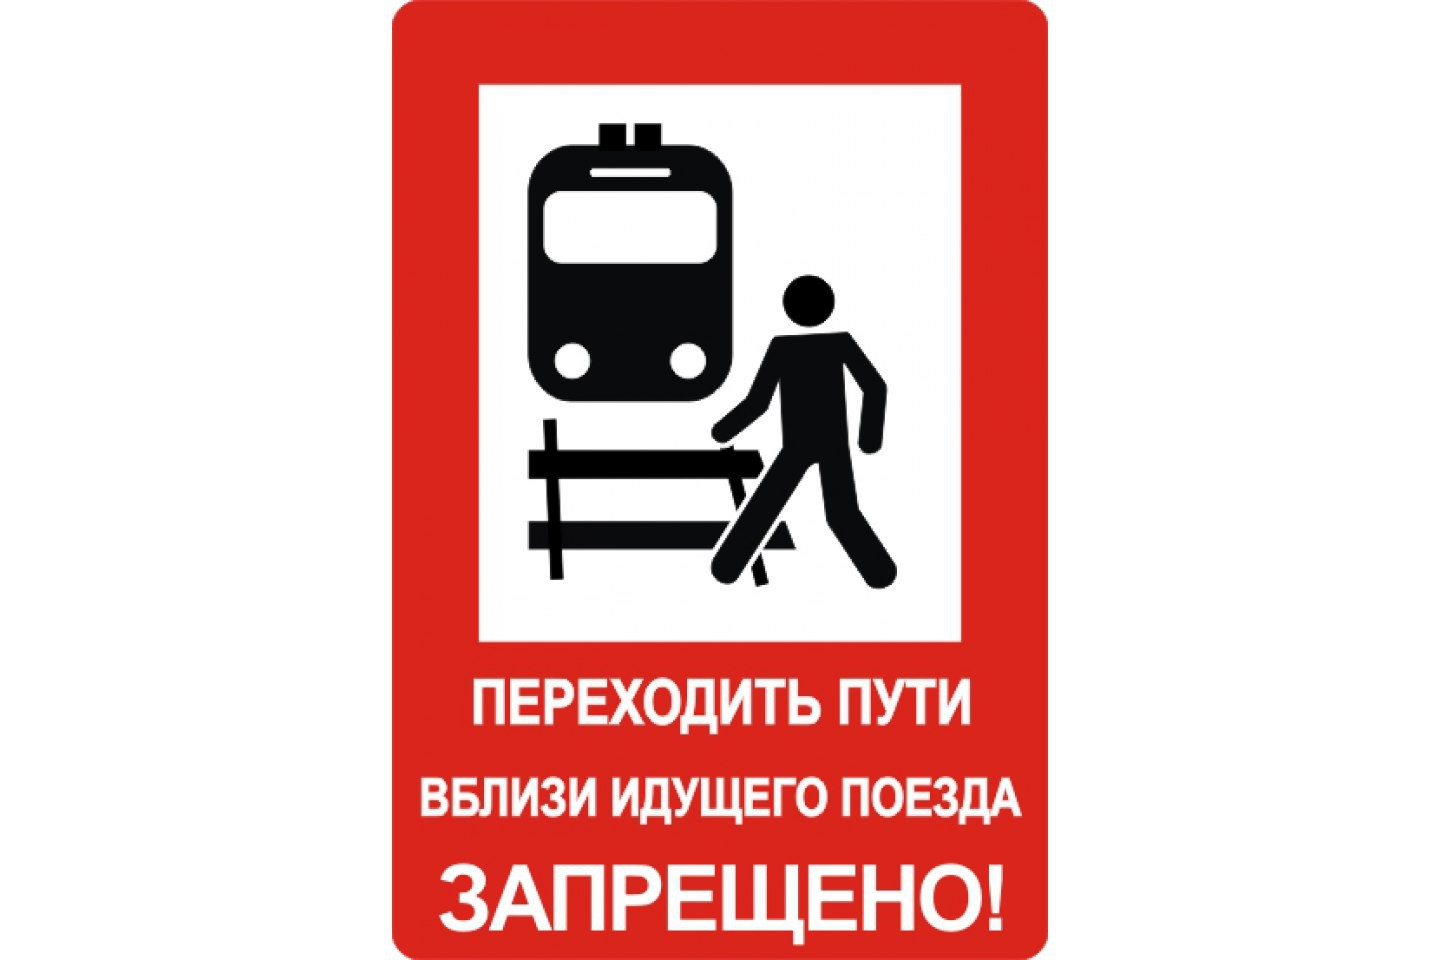

In [55]:
img = image_from_url("https://raw.githubusercontent.com/yandex-ai-studio/ai-studio-course/main/data/img/sign.jpg")
img

Чтобы передать модели изображение - нам нужно в явном виде закодировать картинку в виде base64-encoding, и передать входной текст модели в структурном виде, где явно указывается роль и две части содержмого - изображение и текст: 

In [66]:
import io
import base64

vlm_model = f"gpt://{folder_id}/gemma-3-27b-it/latest"

def image_to_base64(image):
    buffered = io.BytesIO()
    image.save(buffered, format="JPEG")
    return base64.b64encode(buffered.getvalue()).decode()

image_b64 = image_to_base64(img)

prompt = "Распознай текст на картинке"

response = client.responses.create(
    model=vlm_model,
    input=[ 
            {
                "role": "user", 
                "content": [
                    {
                        "type": "input_text",
                        "text": prompt
                    },
                    {
                        "type": "input_image",
                        "image_url": f"data:image/jpeg;base64,{image_b64}",
                        "detail" : "auto"
                    }
                ]
            }
    ]
)

print(response.output_text)

На картинке изображен знак, предупреждающий об опасности.

Текст на знаке:

**ПЕРЕХОДИТЬ ПУТИ
ВБЛИЗИ ИДУЩЕГО ПОЕЗДА
ЗАПРЕЩЕНО!**

Знак означает, что переходить железнодорожные пути, когда приближается поезд, категорически запрещено.


Мы можем попросить модель не только распознать текст, но и сдеать какое-то более интересное действие. Например, попробуем извлечь отзыв о вокзале из его фотографии:

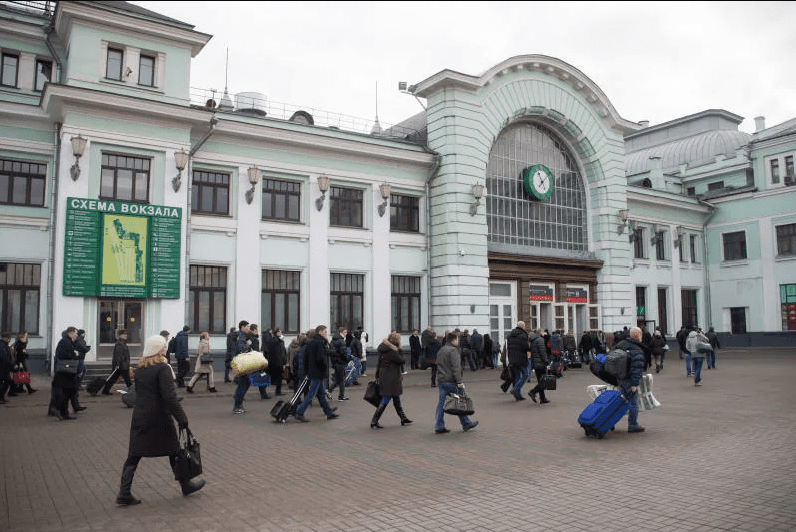

In [67]:
img = image_from_url("https://raw.githubusercontent.com/yandex-ai-studio/ai-studio-course/main/data/img/belorusskiy.png")
img

In [70]:
image_b64 = image_to_base64(img.convert("RGB"))

prompt = "На фотографии изображен вокзал. Напиши положительные и отрицательные моменты про этот вокзал."

response = client.responses.create(
    model=vlm_model,
    input=[ 
            {
                "role": "user", 
                "content": [
                    {
                        "type": "input_text",
                        "text": prompt
                    },
                    {
                        "type": "input_image",
                        "image_url": f"data:image/jpeg;base64,{image_b64}",
                        "detail" : "auto"
                    }
                ]
            }
    ]
)

printx(response.output_text)

Основываясь на фотографии вокзала, вот некоторые положительные и отрицательные моменты:

**Положительные моменты:**

*   **Архитектура:** Здание вокзала выглядит исторически значимым и красивым. Архитектура имеет классический стиль с арками и деталями, что придает ему солидный и внушительный вид.
*   **Близость к городу:** Вокруг вокзала много людей, что может указывать на его центральное расположение и хорошую транспортную доступность.
*   **Схема вокзала:** Наличие схемы вокзала указывает на то, что на вокзале заботятся об удобстве пассажиров.
*   **Инфраструктура:** Присутствие билетных касс (судя по скоплению людей) указывает на наличие базовой инфраструктуры для покупки билетов.
*   **Платформа для пассажиров:** Видно, что есть пространство, где люди ждут прибытие/отправление поездов.

**Отрицательные моменты:**

*   **Скопление людей:**  Большое количество людей может создавать ощущение тесноты и беспорядка. Это может быть неудобно, особенно в часы пик.
*   **Зимняя погода:** На фотографии видно, что на улице холодно (люди одеты в теплую одежду), что создает дискомфорт для ожидающих пассажиров.
*   **Внешний вид:** Видно, что здание требует ремонта или обновления. Фасад выглядит немного обветшалым, особенно покраска.
*    **Отсутствие навесов:** Отсутствие навесов над платформами или зоной ожидания делает пассажиров уязвимыми перед осадками.

В целом, это выглядит как вокзал с историей, но нуждающийся в небольшом уходе и обновлении для улучшения комфорта пассажиров.

## Заключение

В этом ноутбуке мы рассмотрели основы работы с Responses API:

1. **Базовые запросы** — отправка простых вопросов модели
2. **Системные промпты** — настройка поведения модели
3. **Контекст диалога** — поддержание связи между запросами с помощью `store` и `previous_response_id`
4. **JSON Mode** — альтернативный способ получения структурированных данных
5. **Structured Outputs** — получение структурированных данных с использованием pydantic
6. **Визуализация** — построение графиков на основе извлечённых данных
7. **Агрегация** — создание сводок с помощью LLM
8. **Мультимодальные модели** - использование изображений на входе модели